# LETS GROW MORE VIRTUAL INTERNSHIP PROGRAM - DATA SCIENCE

<b>Beginners Level Task # 02

<b>Stock Market Prediction And Forecasting Using Stacked LSTM

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error
import math

In [2]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [4]:
close = df['Close'].reset_index(drop=True)
close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [8]:
df["Date"] = pd.to_datetime(df["Date"], format= "%Y-%m-%d")

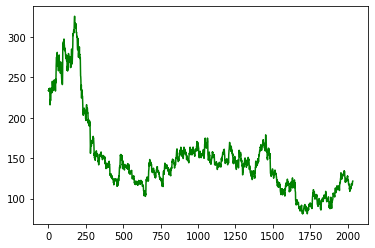

In [18]:
plt.plot(close, 'g-')

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
close = scaler.fit_transform(np.array(close).reshape(-1,1))

In [20]:
close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [24]:
train_size = int(len(close)*0.7)
test_size = len(close) - train_size
train_data, test_data = close[0:train_size,:],close[train_size:len(close),:1]

In [26]:
train_size,test_size

(1424, 611)

In [31]:
def create(dataset, time_step):
	X, Y = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i+time_step), 0]
		X.append(a)
		Y.append(dataset[i + time_step, 0])
	return np.array(X), np.array(Y)

In [32]:
time_step = 100
x_train, y_train = create(train_data, time_step)
x_test, y_test = create(test_data, time_step)

In [33]:
print(x_train.shape) 
print(y_train.shape)

(1323, 100)
(1323,)


In [34]:
print(x_test.shape) 
print(y_test.shape)

(510, 100)
(510,)


In [35]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [46]:
lstm=Sequential()
lstm.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
lstm.add(LSTM(45,return_sequences=True))
lstm.add(LSTM(30))
lstm.add(Dense(1))
lstm.compile(loss='mean_absolute_error',optimizer='RMSprop')

In [47]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 45)           17280     
_________________________________________________________________
lstm_8 (LSTM)                (None, 30)                9120      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 36,831
Trainable params: 36,831
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = lstm.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
21/21 [==============================] - 9s 206ms/step - loss: 0.0821 - val_loss: 0.0611
Epoch 2/50
21/21 [==============================] - 3s 154ms/step - loss: 0.0506 - val_loss: 0.0241
Epoch 3/50
21/21 [==============================] - 3s 154ms/step - loss: 0.0401 - val_loss: 0.0219
Epoch 4/50
21/21 [==============================] - 3s 154ms/step - loss: 0.0414 - val_loss: 0.0351
Epoch 5/50
21/21 [==============================] - 3s 155ms/step - loss: 0.0371 - val_loss: 0.0203
Epoch 6/50
21/21 [==============================] - 3s 154ms/step - loss: 0.0373 - val_loss: 0.0216
Epoch 7/50
21/21 [==============================] - 3s 155ms/step - loss: 0.0332 - val_loss: 0.0202
Epoch 8/50
21/21 [==============================] - 3s 154ms/step - loss: 0.0365 - val_loss: 0.0399
Epoch 9/50
21/21 [==============================] - 3s 154ms/step - loss: 0.0330 - val_loss: 0.0189
Epoch 10/50
21/21 [==============================] - 3s 157ms/step - loss: 0.0325 - val_loss: 0.0357

In [54]:
train_predict = lstm.predict(x_train)
test_predict = lstm.predict(x_test)

In [55]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [56]:
print('Loss On Train Data:',math.sqrt(mean_absolute_error(y_train,train_predict)))
print('Loss On Test Data:',math.sqrt(mean_absolute_error(y_test,test_predict)))

Loss On Train Data: 12.365371821569228
Loss On Test Data: 10.206718004605682


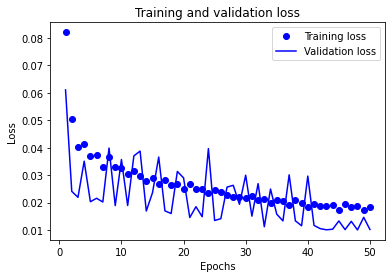

In [57]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()